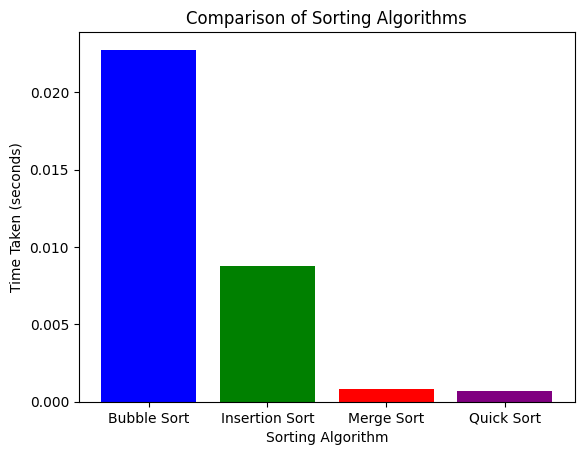

In [1]:
# PART - 02 
#19CSE302 – Design and Analysis of Algorithms          Lab Assignment 1

#1. Generate 1000 integer random numbers between 1 and 10000. Compare the sorting algorithms learnt in the class using 
# the same set of numbers generated. Plot the time taken for them to complete the process.

import random
import timeit
import matplotlib.pyplot as plt
random_numbers = [random.randint(1, 10000) for _ in range(1000)]
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        
        merge_sort(L)
        merge_sort(R)
        
        i = j = k = 0
        
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
        return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)
bubble_time = timeit.timeit(lambda: bubble_sort(random_numbers.copy()), number=1)
insertion_time = timeit.timeit(lambda: insertion_sort(random_numbers.copy()), number=1)
merge_time = timeit.timeit(lambda: merge_sort(random_numbers.copy()), number=1)
quick_time = timeit.timeit(lambda: quick_sort(random_numbers.copy()), number=1)
algorithms = ['Bubble Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort']
times = [bubble_time, insertion_time, merge_time, quick_time]

plt.bar(algorithms, times, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time Taken (seconds)')
plt.title('Comparison of Sorting Algorithms')
plt.show()


In [4]:
import heapq

def merge_sorted_lists(lists):
    result = []

    heap = []
    
    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0)) 
    while heap:
        val, list_index, element_index = heapq.heappop(heap)
        result.append(val)
        if element_index + 1 < len(lists[list_index]):
            heapq.heappush(heap, (lists[list_index][element_index + 1], list_index, element_index + 1))

    return result
lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]
merged_list = merge_sorted_lists(lists)
print(merged_list)


[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


In [6]:
import heapq

def find_k_largest_elements(nums, k):
    heap = nums[:k]
    heapq.heapify(heap)
    for num in nums[k:]:
        if num > heap[0]:
            heapq.heappop(heap)
            heapq.heappush(heap, num)
    return heap
arr = [3, 10, 4, 7, 15, 20, 8]
k = 3
result = find_k_largest_elements(arr, k)
print("K largest elements:", result)


K largest elements: [10, 15, 20]


In [9]:
def max_activities(activities):
    activities.sort(key=lambda x: x[1])
    

    selected_activities = [activities[0]]
    prev_finish_time = activities[0][1]
    
    
    for activity in activities[1:]:
        
        if activity[0] >= prev_finish_time:
            selected_activities.append(activity)
            prev_finish_time = activity[1]
    
    return selected_activities

activities = [
    (1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)
]

max_activities_list = max_activities(activities)
print("Maximum number of activities performed by a single person:")
print(max_activities_list)


Maximum number of activities performed by a single person:
[(1, 4), (5, 7), (8, 11), (12, 14)]


In [12]:
def merge_intervals(intervals):
    intervals.sort(key=lambda x: x[0])
    merged = []
    for interval in intervals:
        
        if not merged or interval[0] > merged[-1][1]:
            merged.append(interval)
        else:
        
            merged[-1] = (merged[-1][0], max(merged[-1][1], interval[1]))
    
    return merged

intervals = [
    (1, 4), (2, 5), (7, 8), (6, 9)
]

merged_intervals = merge_intervals(intervals)

print("Merged intervals:")
print(merged_intervals)


Merged intervals:
[(1, 5), (6, 9)]
